Henry Esteban Cardenas Aleman

#Importar librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

##Activar la gpu 

___
Para que el entrenamiento sea mas rapido

In [2]:
tf.device('cpu:/0')

##Asignamos datos para entrenamiento y test

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Dividimos en 255 por los valores de los colores 


In [4]:
X_train = x_train/255.0
X_test = x_test/255.0

Asiganmos el numero de categorias que hay y definimos nuestras variables de train y test de y


In [5]:
nclasses = 10 #Numero de categorias que hay 
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

Aca solo vemos una imagen y su categoria 

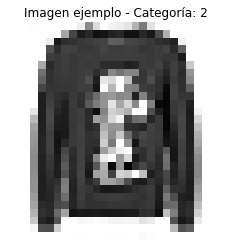

In [6]:
nimagen = 900
plt.imshow(X_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(Y_train[nimagen])))
plt.axis('off')
plt.show()

Asiganmos el numero de categorias que hay y definimos nuestras variables de train y test de x

In [7]:
#Indicamos que solo se usara un canal de color (escala de grises)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#Entrenamiento

___
le doy un valor de 16 filtros y otro de 26 y creo tres capas ocultas con 120,60 y 84 neuronas

In [97]:
modelo = Sequential()  #CONTENEDOR DEL MODELO
#capa convucional
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=26, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#aplanar la red para que se convierta en vector 
modelo.add(Flatten())
modelo.add(Dense(120, activation='relu'))
modelo.add(Dense(60, activation='relu'))
modelo.add(Dense(84, activation='relu'))
modelo.add(Dense(nclasses, activation='sigmoid'))

In [ ]:
modelo.summary()

In [98]:
modelo.compile(tf.keras.optimizers.SGD(0.2), loss='categorical_crossentropy', metrics=['accuracy'])

Entrenamos en un ciclo de 20 y un tamaño de datos de 128

In [99]:
modeloEntrenado = modelo.fit(X_train, Y_train, epochs=20, batch_size=128, verbose=0, validation_data=(X_test,Y_test))

Graficamos la perdida segun cada iteracion 

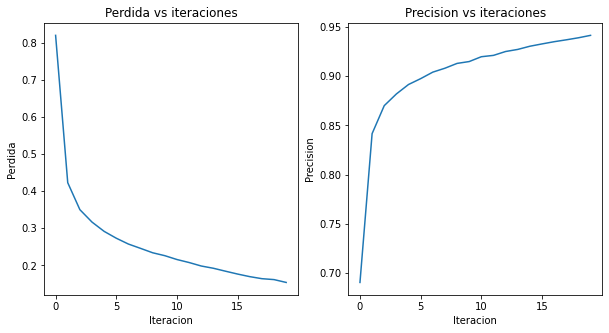

In [100]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Perdida vs iteraciones')
plt.ylabel('Perdida')
plt.xlabel('Iteracion')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precision vs iteraciones')
plt.ylabel('Precision')
plt.xlabel('Iteracion')
plt.show()

Evaluamos la precision 

In [101]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 90.1%


#Hacemos predicciones

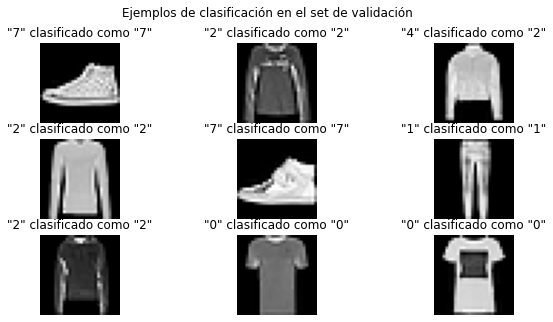

In [103]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

#Realizamos la matriz de confusion

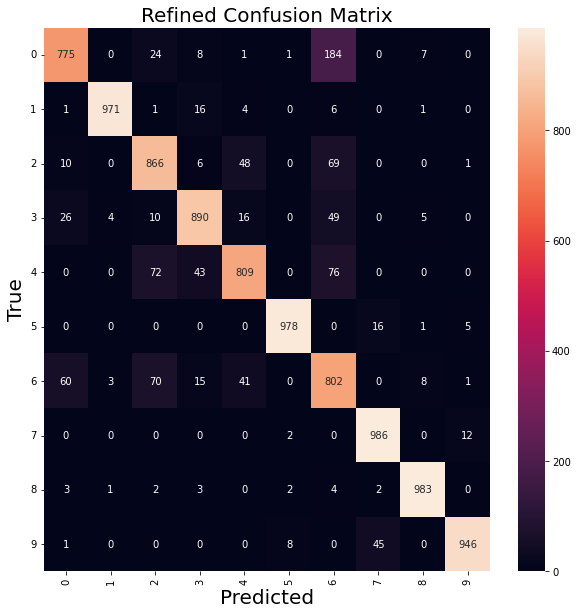

In [104]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


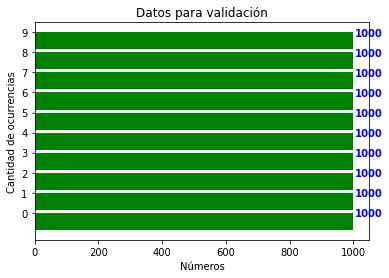

In [106]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo=Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)
for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))  #ubicaciones de los grupos
width = 0.85  #ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

#Conclusion
___
Segun la matriz correlacion y con el porcentaje obtenido en nuestro entrenamiendo(90.1%) es bastante positivo ya que de cada mil datos de cada categoria se hacierta una gran mayoria, se podria aumentar el porcentaje aumentando las capas ocultas o el numero de ciclos de entrenamiento, pero en este caso me parecio optimo el resultado para el ejercicio.